In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
print(train_df.shape)
train_df.head()

(131662, 14)


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [5]:
train_df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [6]:
print("Surge Pricing type: ",train_df['Surge_Pricing_Type'].unique())
print("Type_of_Cab: ",train_df['Type_of_Cab'].unique())
print("Confidence_Life_Style_Index: ",train_df['Confidence_Life_Style_Index'].unique())

Surge Pricing type:  [2 3 1]
Type_of_Cab:  ['B' nan 'C' 'E' 'D' 'A']
Confidence_Life_Style_Index:  ['A' 'B' nan 'C']


In [7]:
train_df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [8]:
#FUNCTION FOR PROVIDING FEATURE SUMMARY
def feature_summary(df_fa):
    print('DataFrame shape')
    print('rows:',df_fa.shape[0])
    print('cols:',df_fa.shape[1])
    col_list=['Null','Unique_Count','Data_type','Max/Min','Mean','Std','Skewness','Sample_values']
    df=pd.DataFrame(index=df_fa.columns,columns=col_list)
    df['Null']=list([len(df_fa[col][df_fa[col].isnull()]) for i,col in enumerate(df_fa.columns)])
    #df['%_Null']=list([len(df_fa[col][df_fa[col].isnull()])/df_fa.shape[0]*100 for i,col in enumerate(df_fa.columns)])
    df['Unique_Count']=list([len(df_fa[col].unique()) for i,col in enumerate(df_fa.columns)])
    df['Data_type']=list([df_fa[col].dtype for i,col in enumerate(df_fa.columns)])
    for i,col in enumerate(df_fa.columns):
        if 'float' in str(df_fa[col].dtype) or 'int' in str(df_fa[col].dtype):
            df.at[col,'Max/Min']=str(round(df_fa[col].max(),2))+'/'+str(round(df_fa[col].min(),2))
            df.at[col,'Mean']=df_fa[col].mean()
            df.at[col,'Std']=df_fa[col].std()
            df.at[col,'Skewness']=df_fa[col].skew()
        df.at[col,'Sample_values']=list(df_fa[col].unique())
           
    return(df.fillna('-'))

In [9]:
#train=pd.read_csv(path1+'application_train.csv')
print('application_train Feature Summary')
with pd.option_context('display.max_rows',train_df.shape[1]):
    train_fs=feature_summary(train_df) 

application_train Feature Summary
DataFrame shape
rows: 131662
cols: 14


In [10]:
train_fs

,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values
Trip_ID,0,131662,object,-,-,-,-,"[T0005689460, T0005689461, T0005689464, T00056..."
Trip_Distance,0,10326,float64,109.23/0.31,44.2009,25.5229,0.723752,"[6.77, 29.47, 41.58, 61.56, 54.95, 19.06, 29.7..."
Type_of_Cab,20210,6,object,-,-,-,-,"[B, nan, C, E, D, A]"
Customer_Since_Months,5920,12,float64,10.0/0.0,6.01666,3.62689,-0.246954,"[1.0, 10.0, 2.0, 3.0, 5.0, 0.0, nan, 4.0, 9.0,..."
Life_Style_Index,20193,55979,float64,4.88/1.6,2.80206,0.225796,0.193994,"[2.42769, 2.78245, nan, 3.0345299999999997, 2...."
Confidence_Life_Style_Index,20193,4,object,-,-,-,-,"[A, B, nan, C]"
Destination_Type,0,14,object,-,-,-,-,"[A, E, B, C, G, D, F, K, L, H, I, J, M, N]"
Customer_Rating,0,3931,float64,5.0/0.0,2.84946,0.980675,-0.191131,"[3.905, 3.45, 3.50125, 3.45375, 3.4025, 2.5975..."
Cancellation_Last_1Month,0,9,int64,8/0,0.782838,1.03756,1.55087,"[0, 2, 4, 1, 5, 3, 6, 7, 8]"
Var1,71030,123,float64,210.0/30.0,64.2027,21.8204,0.465401,"[40.0, 38.0, nan, 51.0, 72.0, 83.0, 103.0, 89...."


In [11]:
nominal_var = list(train_fs[train_fs['Data_type'] == 'object'].index)
print("Total categorical columns are:",len(nominal_var))
print(nominal_var)

Total categorical columns are: 5
['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']


In [12]:
ord_var = list(train_fs[train_fs['Data_type'] == 'int64'].index)
print("Total ordinal columns are:",len(ord_var))
print(ord_var)

Total categorical columns are: 4
['Cancellation_Last_1Month', 'Var2', 'Var3', 'Surge_Pricing_Type']


In [13]:
cont_var = train_fs[train_fs['Data_type'] == 'float64'].index
print("Total categorical columns are:",len(cont_var))
print(cont_var)

Total categorical columns are: 5
Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Var1'],
      dtype='object')


Continous variable:
    'Trip_Distance', 
    'Customer_Since_Months', (5920)
    'Life_Style_Index',(20193)
    'Customer_Rating', 
    'Var1'(71030)
    
Categorical Variables:
    Nominal:
        'Trip_ID', 
        'Type_of_Cab', (20210)
        'Confidence_Life_Style_Index',(20193)
        'Destination_Type', 
        'Gender'
    Ordinal:
        'Cancellation_Last_1Month', 
        'Var2', 
        'Var3', 
        'Surge_Pricing_Type'
        

Rectangle(xy=(-0.4, 0), width=0.8, height=27214, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=56728, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=47720, angle=0)


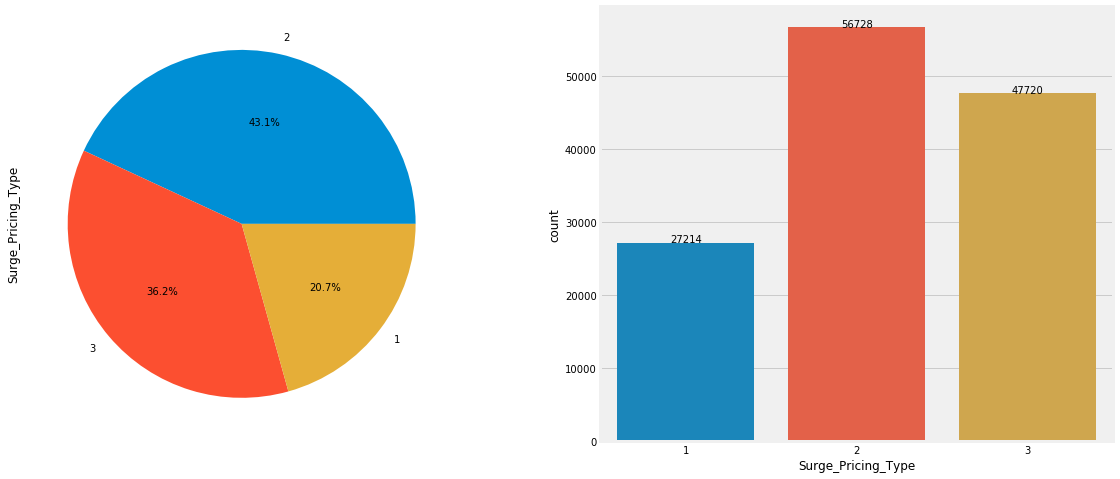

In [14]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train_df['Surge_Pricing_Type'].value_counts().plot.pie(autopct='%1.1f%%',ax = ax[0])
graph = sns.countplot('Surge_Pricing_Type',data = train_df,ax = ax[1])
i=1
for p in graph.patches:
    print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,train_df['Surge_Pricing_Type'].value_counts()[i],ha="center")
    i += 1

EDA for Categorical Features:
    Nominal features

In [15]:
target = 'Surge_Pricing_Type'
nominal_var.remove('Trip_ID')
ord_var.remove('Surge_Pricing_Type')

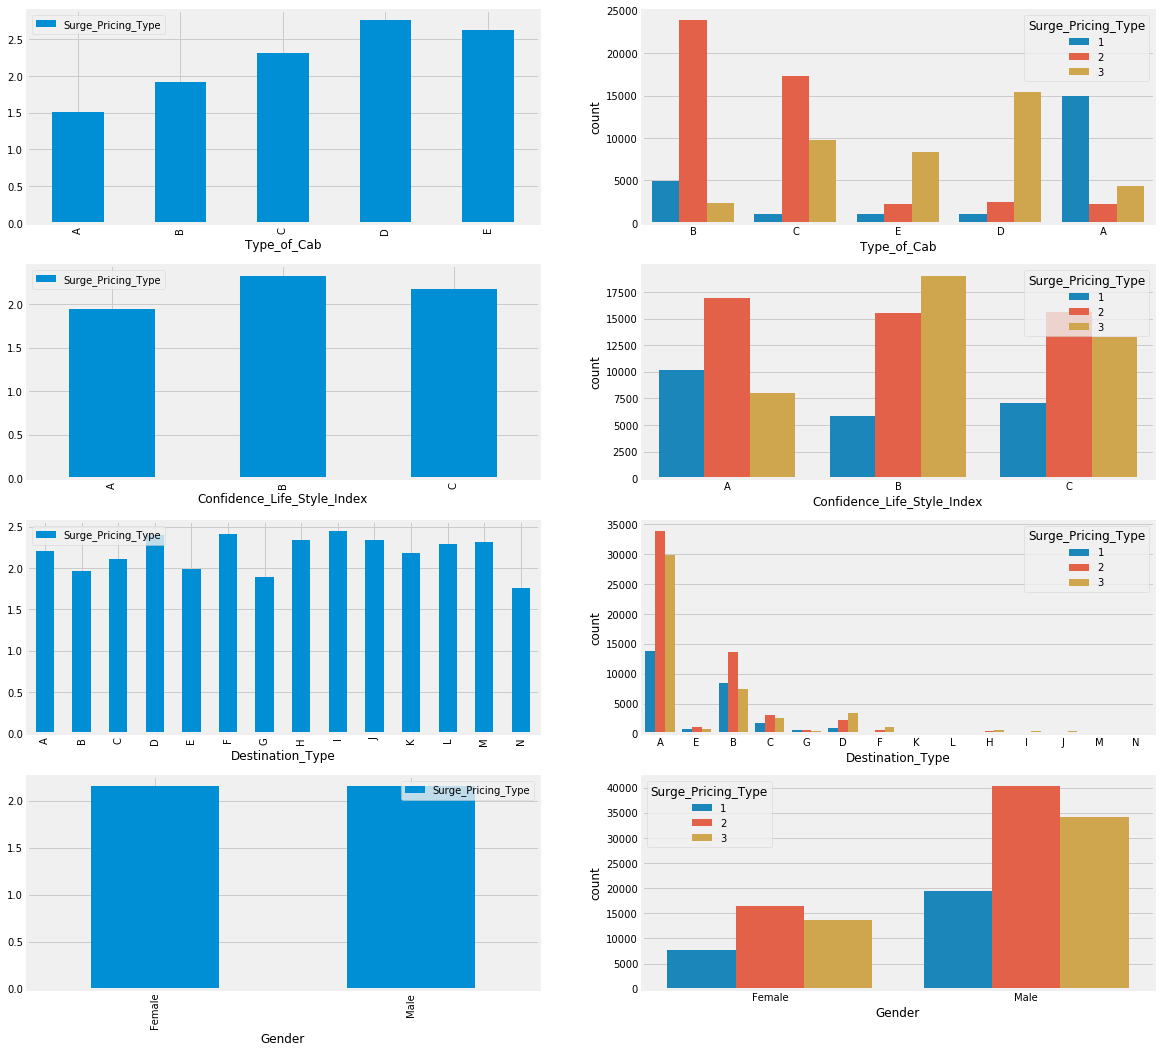

In [16]:

f,ax = plt.subplots(len(nominal_var),2,figsize = (18,18))
#data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
for i in range(len(nominal_var)):
    train_df[[nominal_var[i],target]].groupby([nominal_var[i]]).mean().plot.bar(ax = ax[i][0])
    sns.countplot(nominal_var[i],data = train_df,ax = ax[i][1],hue=target)

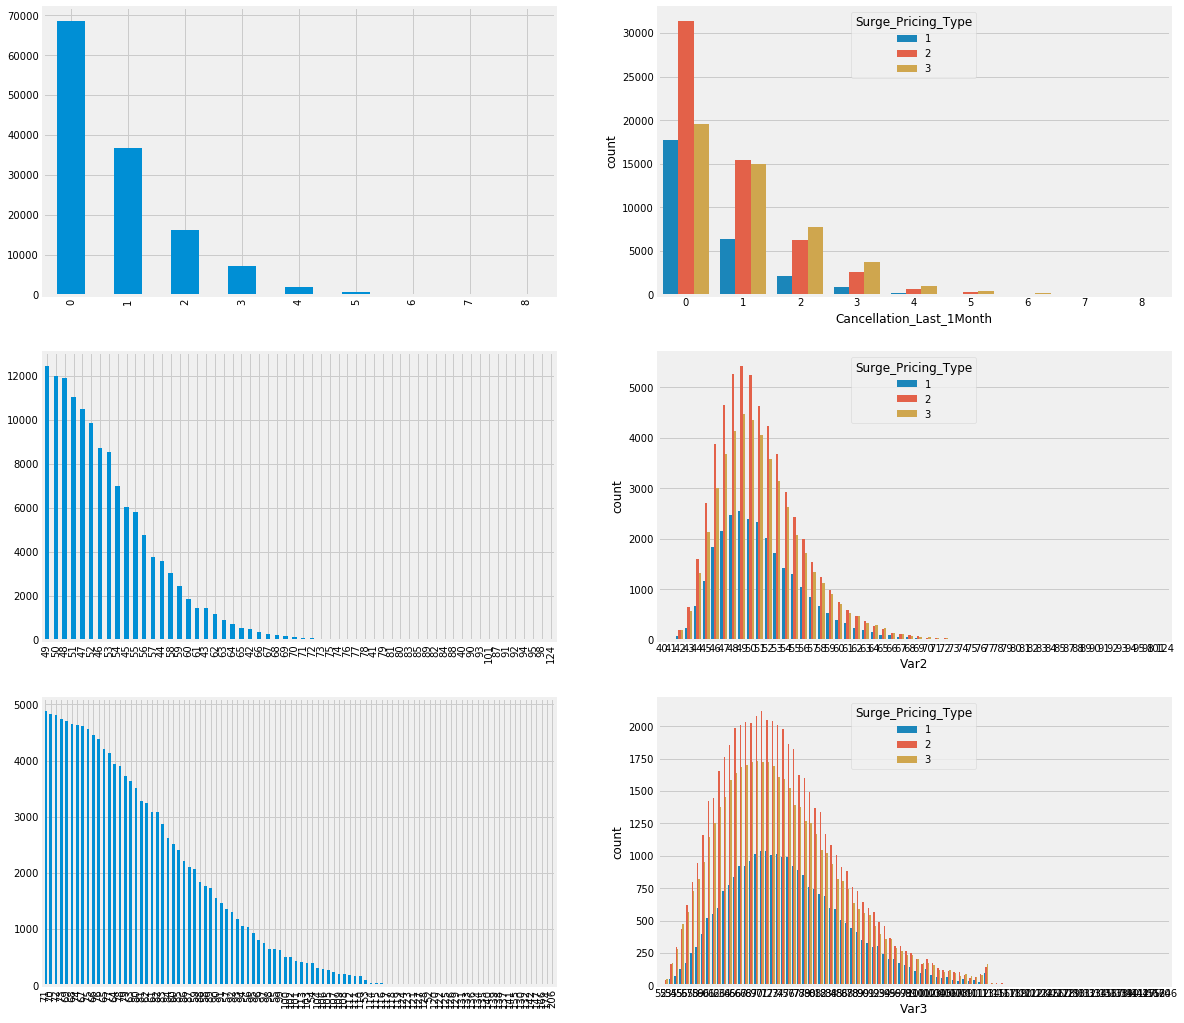

In [18]:
f,ax = plt.subplots(len(ord_var),2,figsize = (18,18))
#data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
for i in range(len(ord_var)):
    train_df[ord_var[i]].value_counts().plot.bar(ax = ax[i][0])
    #data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
    sns.countplot(ord_var[i],data = train_df,ax = ax[i][1],hue=target)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
train_fs

,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values
Trip_ID,0,131662,object,-,-,-,-,"[T0005689460, T0005689461, T0005689464, T00056..."
Trip_Distance,0,10326,float64,109.23/0.31,44.2009,25.5229,0.723752,"[6.77, 29.47, 41.58, 61.56, 54.95, 19.06, 29.7..."
Type_of_Cab,20210,6,object,-,-,-,-,"[B, nan, C, E, D, A]"
Customer_Since_Months,5920,12,float64,10.0/0.0,6.01666,3.62689,-0.246954,"[1.0, 10.0, 2.0, 3.0, 5.0, 0.0, nan, 4.0, 9.0,..."
Life_Style_Index,20193,55979,float64,4.88/1.6,2.80206,0.225796,0.193994,"[2.42769, 2.78245, nan, 3.0345299999999997, 2...."
Confidence_Life_Style_Index,20193,4,object,-,-,-,-,"[A, B, nan, C]"
Destination_Type,0,14,object,-,-,-,-,"[A, E, B, C, G, D, F, K, L, H, I, J, M, N]"
Customer_Rating,0,3931,float64,5.0/0.0,2.84946,0.980675,-0.191131,"[3.905, 3.45, 3.50125, 3.45375, 3.4025, 2.5975..."
Cancellation_Last_1Month,0,9,int64,8/0,0.782838,1.03756,1.55087,"[0, 2, 4, 1, 5, 3, 6, 7, 8]"
Var1,71030,123,float64,210.0/30.0,64.2027,21.8204,0.465401,"[40.0, 38.0, nan, 51.0, 72.0, 83.0, 103.0, 89...."


In [19]:
df1=train_df

#df1.mode()

In [20]:
def drop_col(data):
    data = data.drop(['Trip_ID','Var1','Life_Style_Index'],axis = 1)
    return data

In [21]:
def fill_null(data):
    data['Type_of_Cab'] = data['Type_of_Cab'].fillna('B')
    data['Customer_Since_Months'] = data['Customer_Since_Months'].fillna('10')
    data['Confidence_Life_Style_Index'] = data['Confidence_Life_Style_Index'].fillna('B')
    #print(data)
    return data

In [22]:
def lable_encod(le,data,nominal_var):
    for col in nominal_var:
        data[col]=le.fit_transform(data[col])
    return data

In [23]:
#find the mode to fill the null values
df1 = drop_col(df1)
#print(df1.mode())
df1 = fill_null(df1)
df1 = lable_encod(le,df1,nominal_var)

   Trip_Distance Type_of_Cab  Customer_Since_Months  \
0          30.18           B                   10.0   

  Confidence_Life_Style_Index Destination_Type  Customer_Rating  \
0                           B                A             2.75   

   Cancellation_Last_1Month  Var2  Var3 Gender  Surge_Pricing_Type  
0                         0    49    71   Male                   2  


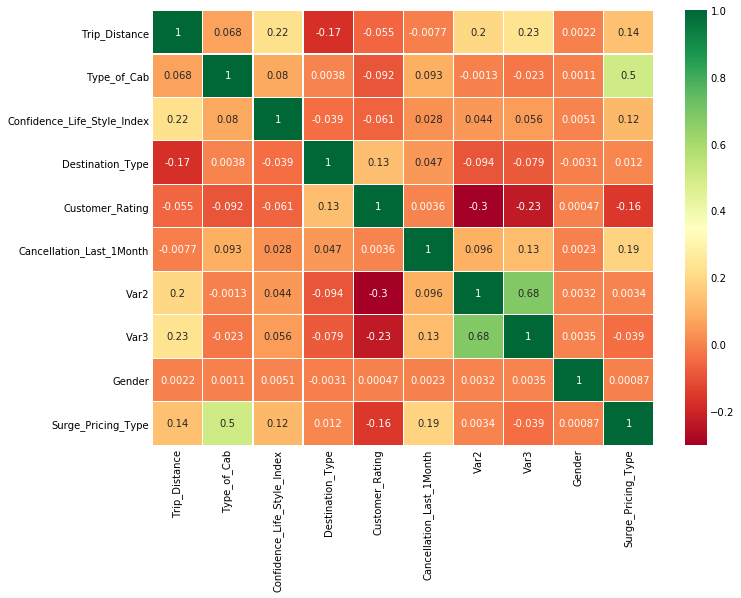

In [24]:
sns.heatmap(df1.corr(),annot = True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing

In [26]:
X = df1.drop([target],axis = 1) 
y = df1[target]

In [27]:
def Scaling(X):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X)
    return X_train_scaled 

In [28]:
X_train_scaled = Scaling(X)

In [29]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, random_state = 0,test_size = 0.3)

In [30]:
X_train.shape

(92163, 10)

In [31]:
#SVM
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 


In [32]:
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions)

0.6602192460568622


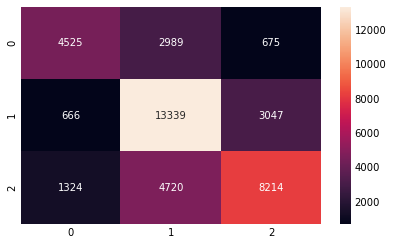

In [43]:

print(accuracy)
sns.heatmap(cm,annot=True,fmt = '')

In [65]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)

0.6360920529633661


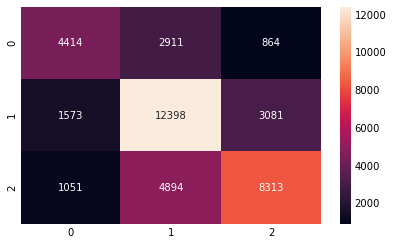

In [66]:
sns.heatmap(cm,annot=True,fmt = '')

In [68]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

# Test Data

In [46]:
print(test_df.shape)
test_df.head()

(87395, 13)


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [39]:
test_df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [40]:
test_df1 = test_df
#find the mode to fill the null values
test_df1 = drop_col(test_df1)
#print(df1.mode())
test_df1 = fill_null(test_df1)
test_df1 = lable_encod(le,test_df1,nominal_var)

In [41]:
X_test_scaled = Scaling(test_df1)

In [60]:
sub = pd.DataFrame(test_df[['Trip_ID']])

In [44]:
#SVM
svm_values = svm_model_linear.predict(X_test_scaled)
sub['Surge_Pricing_Type'] = svm_values
sub.to_csv('svmlinear.csv',index = False)

In [67]:
#KNN
knn_values = knn.predict(X_test_scaled)
sub['Surge_Pricing_Type'] = knn_values
sub.to_csv('knnlinear.csv',index = False)